In [1]:
# import libraries
import datetime
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from pickle import load
from pickle import dump
from sklearn.tree import export_text
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import ensemble
from sklearn.tree import export_text
import sklearn.metrics

In [8]:
# convert mat data to panda
def load_data(battery):
  mat = loadmat('/Users/yi-chenlin/Desktop/Final project/battery_data/' + battery + '.mat')
  print('Total data in dataset: ', len(mat[battery][0, 0]['cycle'][0]))
  counter = 0
  dataset = []
  capacity_data = []
  
  for i in range(len(mat[battery][0, 0]['cycle'][0])):
    row = mat[battery][0, 0]['cycle'][0, i]
    if row['type'][0] == 'discharge':
      ambient_temperature = row['ambient_temperature'][0][0]
      date_time = datetime.datetime(int(row['time'][0][0]),
                               int(row['time'][0][1]),
                               int(row['time'][0][2]),
                               int(row['time'][0][3]),
                               int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
      data = row['data']
      capacity = data[0][0]['Capacity'][0][0]
      for j in range(len(data[0][0]['Voltage_measured'][0])):
        voltage_measured = data[0][0]['Voltage_measured'][0][j]
        current_measured = data[0][0]['Current_measured'][0][j]
        temperature_measured = data[0][0]['Temperature_measured'][0][j]
        current_load = data[0][0]['Current_load'][0][j]
        voltage_load = data[0][0]['Voltage_load'][0][j]
        time = data[0][0]['Time'][0][j]
        dataset.append([counter + 1, ambient_temperature, date_time, capacity,
                        voltage_measured, current_measured,
                        temperature_measured, current_load,
                        voltage_load, time])
      capacity_data.append([counter + 1, ambient_temperature, date_time, capacity])
      counter = counter + 1
  print(dataset[0])
  return [pd.DataFrame(data=dataset,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity', 'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current_load', 'voltage_load', 'time']),
          pd.DataFrame(data=capacity_data,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity'])]

In [3]:
dataset, capacity = load_data('B0005')

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.8564874208181574, 4.191491807505295, -0.004901589207462691, 24.330033885570543, -0.0006, 0.0, 0.0]


# Data understanding

In [4]:
dataset.head()

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000
1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781
2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703
3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781
4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50285 entries, 0 to 50284
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cycle                 50285 non-null  int64         
 1   ambient_temperature   50285 non-null  int8          
 2   datetime              50285 non-null  datetime64[ns]
 3   capacity              50285 non-null  float64       
 4   voltage_measured      50285 non-null  float64       
 5   current_measured      50285 non-null  float64       
 6   temperature_measured  50285 non-null  float64       
 7   current_load          50285 non-null  float64       
 8   voltage_load          50285 non-null  float64       
 9   time                  50285 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), int8(1)
memory usage: 3.5 MB


## Basic statistics

In [6]:
dataset.describe()

,cycle,ambient_temperature,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
count,50285.000000,50285.0,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000
mean,88.125942,24.0,1.560345,3.515268,-1.806032,32.816991,1.362700,2.308406,1546.208924
std,45.699687,0.0,0.182380,0.231778,0.610502,3.987515,1.313698,0.800300,906.640295
min,1.000000,24.0,1.287453,2.455679,-2.029098,23.214802,-1.998400,0.000000,0.000000
25%,50.000000,24.0,1.386229,3.399384,-2.013415,30.019392,1.998000,2.388000,768.563000
50%,88.000000,24.0,1.538237,3.511664,-2.012312,32.828944,1.998200,2.533000,1537.031000
75%,127.000000,24.0,1.746871,3.660903,-2.011052,35.920887,1.998200,2.690000,2305.984000
max,168.000000,24.0,1.856487,4.222920,0.007496,41.450232,1.998400,4.238000,3690.234000


In [7]:
dataset.describe().to_csv(r'Statistics/rul-statistics.csv', index = True)

## EDA

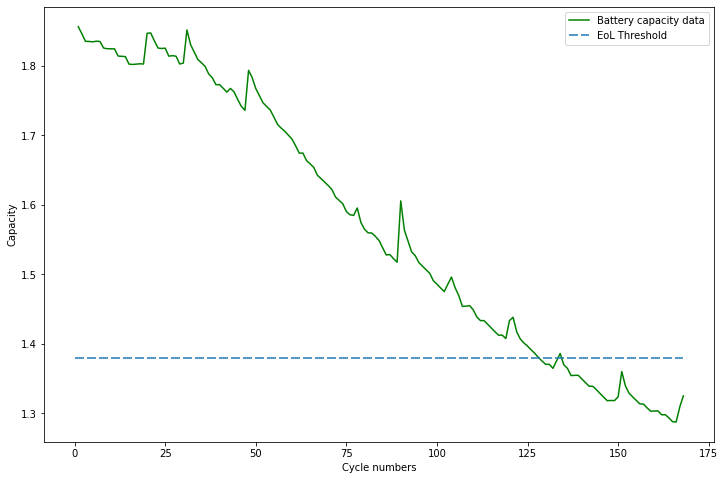

In [8]:
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.plot(dataset[['cycle']], dataset[['capacity']] , color='green', label='Battery capacity data')
ax.plot([0.,168], [1.38, 1.38],dashes=[6, 2], label="EoL Threshold")
ax.set(xlabel='Cycle numbers', ylabel='Capacity')
ax.legend()

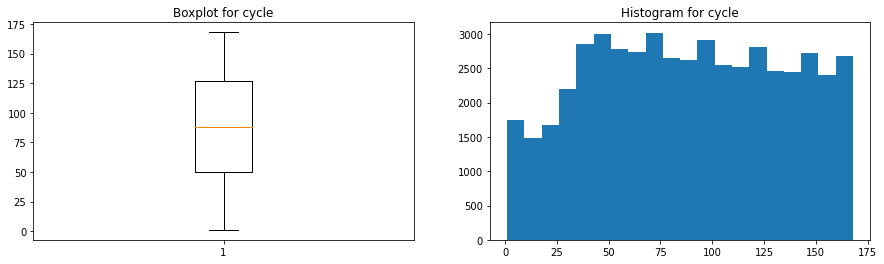

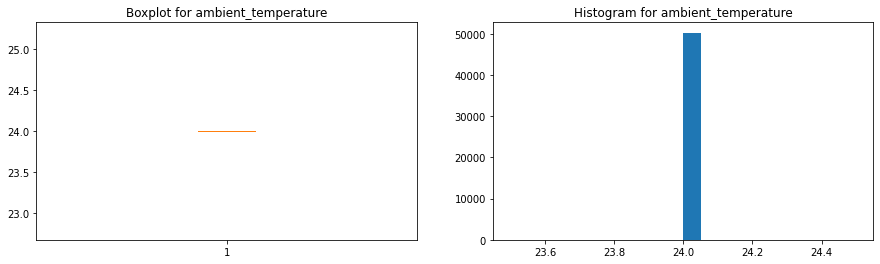

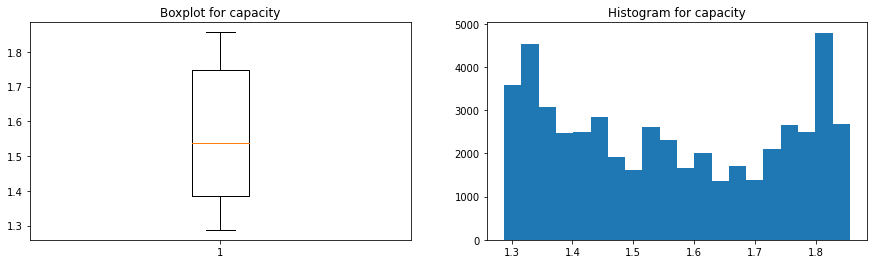

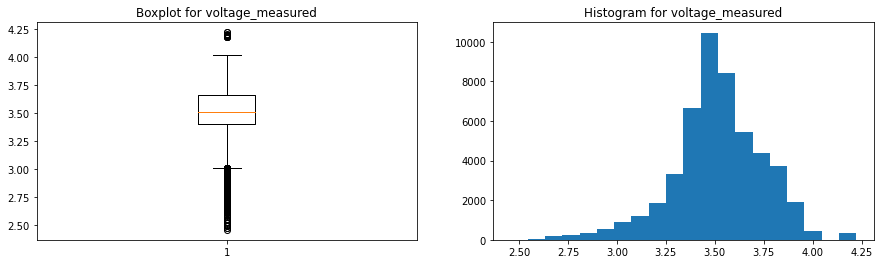

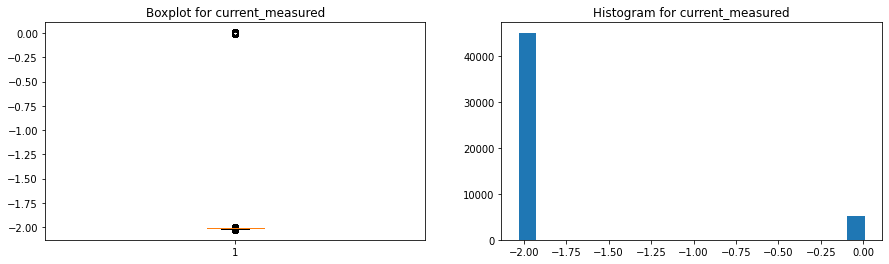

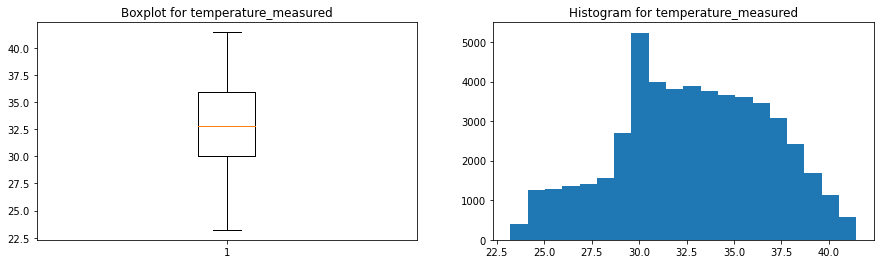

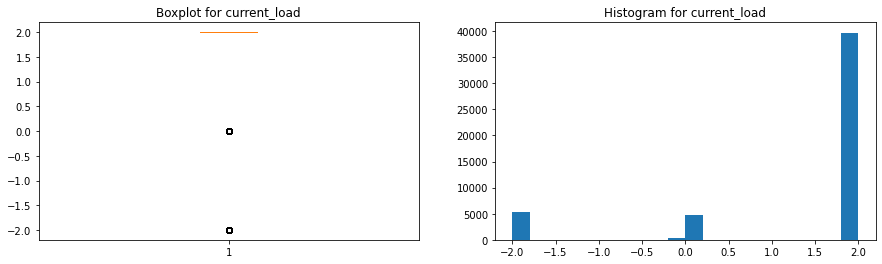

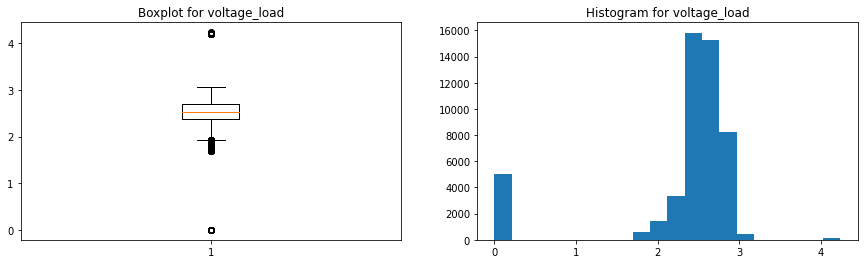

In [9]:
# Boxpot and histogram of each feature
for feature in ['cycle', 'ambient_temperature', 'capacity', 'voltage_measured', 'current_measured', 
                    'temperature_measured', 'current_load', 'voltage_load']:
    # Creating an empty chart
    fig, ((ax1, ax2)) = plt.subplots(1, 2,  figsize=(15, 4))

    # Extracting the feature values
    x = dataset[feature].values

    # Boxplot
    ax1.boxplot(x)
    ax1.set_title( 'Boxplot for {}'.format(feature) )

    # Histogram
    ax2.hist(x, bins=20)
    ax2.set_title( 'Histogram for {}'.format(feature) )

    # Display
    plt.show()

In [10]:
# Checking for null values
features = ['cycle', 'ambient_temperature',
                                'capacity', 'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current_load', 'voltage_load', 'time']
N_null = sum(dataset[features].isnull().sum())
print("The dataset contains {} null values".format(N_null)) 

# Removing duplicates if there exist
N_dupli = sum(dataset.duplicated(keep='first'))
dataset = dataset.drop_duplicates(keep='first').reset_index(drop=True)
print("The dataset contains {} duplicates".format(N_dupli))

# Number of samples in the dataset
N = dataset.shape[0]
print('Size of cleaned dataset: ', N)

The dataset contains 0 null values
The dataset contains 0 duplicates
Size of cleaned dataset:  50285


## Correlation matrix and heatmap

In [11]:
dataset[features].corr()

,cycle,ambient_temperature,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
cycle,1.000000,NaN,-0.986857,-0.132877,0.127769,0.139936,0.455661,-0.177385,-0.119383
ambient_temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capacity,-0.986857,NaN,1.000000,0.135859,-0.132162,-0.143717,-0.407819,0.181684,0.119542
voltage_measured,-0.132877,NaN,0.135859,1.000000,-0.091667,-0.914580,-0.034467,0.384095,-0.817528
current_measured,0.127769,NaN,-0.132162,-0.091667,1.000000,0.354628,-0.350758,-0.917754,0.416898
temperature_measured,0.139936,NaN,-0.143717,-0.914580,0.354628,1.000000,-0.091684,-0.601707,0.915537
current_load,0.455661,NaN,-0.407819,-0.034467,-0.350758,-0.091684,1.000000,0.289994,-0.225579
voltage_load,-0.177385,NaN,0.181684,0.384095,-0.917754,-0.601707,0.289994,1.000000,-0.628276
time,-0.119383,NaN,0.119542,-0.817528,0.416898,0.915537,-0.225579,-0.628276,1.000000


In [12]:
dataset.corr().to_csv(r'Statistics/battery-corr.csv', index = True)

<AxesSubplot:>

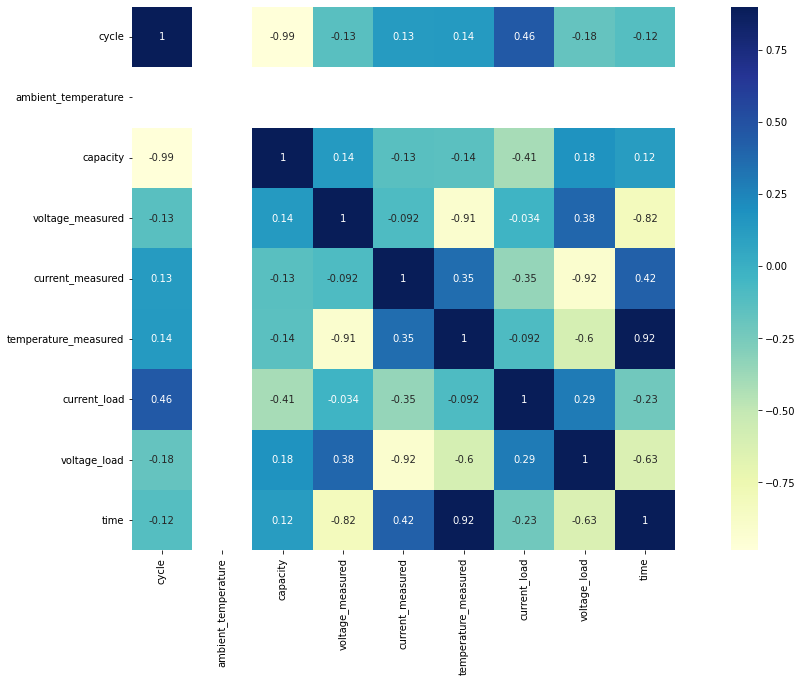

In [13]:
# make correlation matrix to heatmap
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(dataset[features].corr(), cmap='YlGnBu', vmax = .9, square = True, annot=True)

## Feature importance

In [14]:
X = dataset[['cycle', 'ambient_temperature',
                                 'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current_load', 'voltage_load', 'time']]
y = dataset['capacity']

In [15]:
rf = ensemble.RandomForestRegressor()
single_rf = ensemble.RandomForestRegressor(n_estimators = 200, max_depth = 15)
single_rf.fit(X, y)
y_pred = single_rf.predict(X)

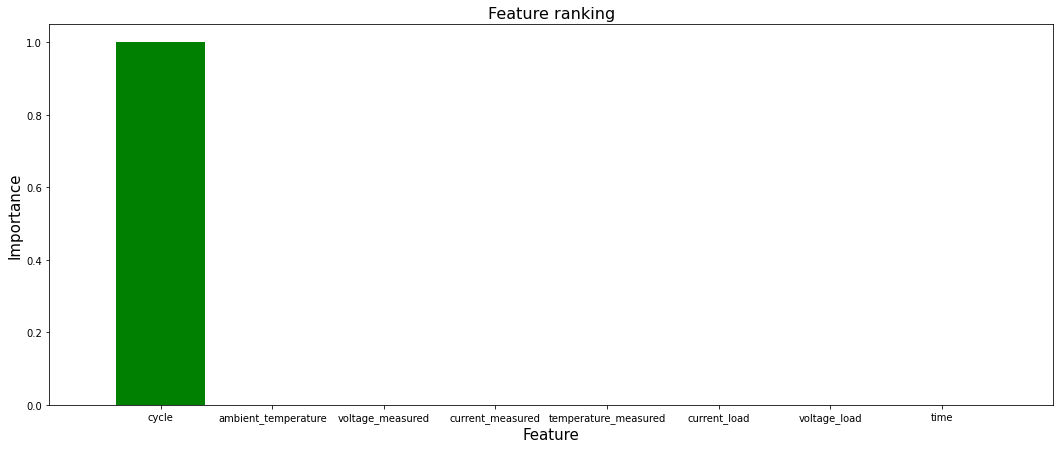

In [16]:
# graph feature importance
importances = single_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns    
f, ax = plt.subplots(figsize=(18, 7))
plt.title("Feature ranking", fontsize = 16)
plt.bar(range(X.shape[1]), importances[indices], color="g", align="center")
plt.xticks(range(X.shape[1]), feature_names)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importance", fontsize = 15)
plt.xlabel("Feature", fontsize = 15)
plt.show()

Cycle is the only one revelant to capacity

In [17]:
# list feature importance
important_features = pd.Series(data=single_rf.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features.head(10))

cycle                   9.998857e-01
current_load            1.143271e-04
current_measured        1.908401e-08
time                    8.023529e-10
voltage_measured        6.937986e-14
temperature_measured    6.628725e-14
voltage_load            5.554914e-14
ambient_temperature     0.000000e+00
dtype: float64


From the feature importance result, it seems that cycle is the only considerable feature to predict capacity. 

## Split data and scaling data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [19]:
X_train

,cycle,ambient_temperature,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,1,24,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000
1,1,24,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781
2,1,24,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703
3,1,24,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781
4,1,24,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922
...,...,...,...,...,...,...,...,...
40223,135,24,3.360799,-2.010457,36.185453,1.9982,2.398,1855.031
40224,135,24,3.358384,-2.012746,36.238577,1.9982,2.396,1864.406
40225,135,24,3.356175,-2.012531,36.295522,1.9982,2.394,1873.703
40226,135,24,3.353691,-2.012193,36.352229,1.9982,2.392,1883.063


In [20]:
X_test

,cycle,ambient_temperature,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
40228,135,24,3.348997,-2.011760,36.448980,1.9980,2.387,1901.828
40229,135,24,3.346386,-2.012456,36.507417,1.9982,2.384,1911.219
40230,135,24,3.343825,-2.014181,36.559807,1.9982,2.382,1920.609
40231,135,24,3.341496,-2.011917,36.622468,1.9982,2.380,1929.969
40232,135,24,3.338640,-2.012436,36.671214,1.9982,2.377,1939.359
...,...,...,...,...,...,...,...,...
50280,168,24,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312
50281,168,24,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062
50282,168,24,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828
50283,168,24,3.587336,0.001219,34.565580,0.0006,0.000,2810.640


In [21]:
# pickle data for later use
dump(X_train, open("pickle/dataset/battery/X_train.pkl", "wb"))
dump(y_train, open("pickle/dataset/battery/y_train.pkl", "wb"))
dump(X_test, open("pickle/dataset/battery/X_test.pkl", "wb"))
dump(y_test, open("pickle/dataset/battery/y_test.pkl", "wb"))

## SVM regressor

In [2]:
# load data
X_train = load(open('pickle/dataset/battery/X_train.pkl', 'rb'))
y_train = load(open('pickle/dataset/battery/y_train.pkl', 'rb'))
X_test = load(open('pickle/dataset/battery/X_test.pkl', 'rb'))
y_test = load(open('pickle/dataset/battery/y_test.pkl', 'rb'))

In [3]:
svr = SVR(C=20, epsilon=0.0001, gamma=0.00001, cache_size=200,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

svr.fit(X_train,y_train)

SVR(C=20, epsilon=0.0001, gamma=1e-05)

In [4]:
y_pred = svr.predict(X_train.append(X_test))

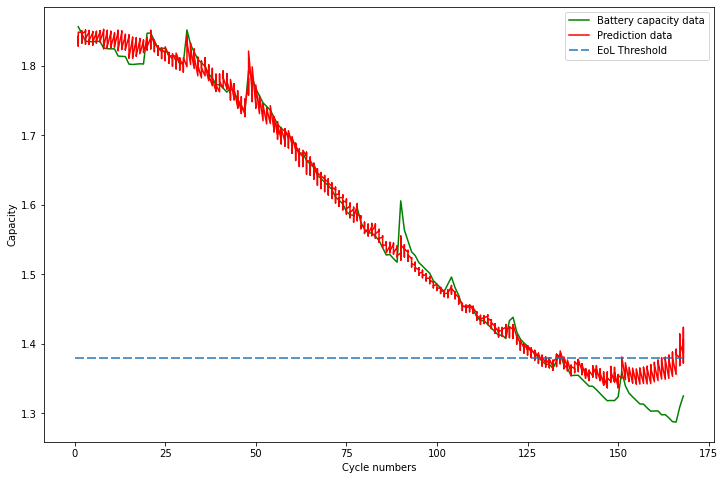

In [5]:
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.plot(X_train.append(X_test)['cycle'], y_train.append(y_test), color='green', label='Battery capacity data')
ax.plot(X_train.append(X_test)['cycle'], y_pred, color='red', label='Prediction data')
ax.plot([0.,168], [1.38, 1.38],dashes=[6, 2], label="EoL Threshold")
ax.set(xlabel='Cycle numbers', ylabel='Capacity')
ax.legend()

In [9]:
dataset, _ = load_data('B0005')
dataset['pre'] = y_pred

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.8564874208181574, 4.191491807505295, -0.004901589207462691, 24.330033885570543, -0.0006, 0.0, 0.0]


In [10]:
#ln = len(X_train)
pred=0
Afil=0
Pfil=0
a=dataset['capacity'].values
b=dataset['pre'].values
j=0
k=0
for i in range(len(a)):
    actual=a[i]
    
    if actual<=1.38:
        j=i
        Afil=dataset['cycle'][j]
        break
for i in range(len(a)):
    pred=b[i]
    if pred< 1.38:
        k=i
        Pfil=dataset['cycle'][k]
        break
print("The Actual fail at cycle number: "+ str(Afil))
print("The prediction fail at cycle number: "+ str(Pfil))
RULerror=Pfil-Afil
print("The error of RUL= "+ str(RULerror)+ " Cycle(s)")

The Actual fail at cycle number: 129
The prediction fail at cycle number: 127
The error of RUL= -2 Cycle(s)


In [11]:
train_predictions = svr.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
print('Train RMSE: %.3f' % rmse)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))

test_predictions = svr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print('Test RMSE: %.3f' % rmse)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Train RMSE: 0.014
Train R2 score: 0.9918552027791366
Test RMSE: 0.048
Test R2 score: -4.028755379916393


## Auto ML

## TPOT

In [29]:
# load data
X_train = load(open('pickle/dataset/battery/X_train.pkl', 'rb'))
y_train = load(open('pickle/dataset/battery/y_train.pkl', 'rb'))
X_test = load(open('pickle/dataset/battery/X_test.pkl', 'rb'))
y_test = load(open('pickle/dataset/battery/y_test.pkl', 'rb'))

In [30]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('TPOT/tpot_battery_pipeline.py')

                                                                               
Generation 1 - Current best internal CV score: -0.0010987347994880538
                                                                                
Generation 2 - Current best internal CV score: -0.0010987347994880538
                                                                                
Generation 3 - Current best internal CV score: -0.0010660519615302666
                                                                                
Generation 4 - Current best internal CV score: -0.0010660519615302666
                                                                                
Generation 5 - Current best internal CV score: -0.0010660519615302666
                                                             
Best pipeline: LassoLarsCV(ExtraTreesRegressor(SelectFromModel(input_matrix, max_features=0.9500000000000001, n_estimators=100, threshold=0.35000000000000003), bootstrap=True, max_feat

### Try the best TPOT result

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.8564874208181574, 4.191491807505295, -0.004901589207462691, 24.330033885570543, -0.0006, 0.0, 0.0]


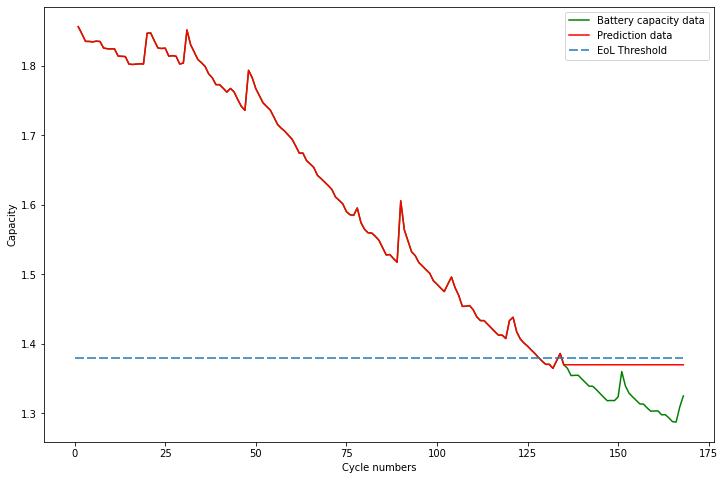

In [12]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoLarsCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

exported_pipeline = make_pipeline(
    SelectFromModel(estimator=ExtraTreesRegressor(max_features=0.9500000000000001, n_estimators=100), threshold=0.35000000000000003),
    StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=True, max_features=0.9500000000000001, min_samples_leaf=8, min_samples_split=7, n_estimators=100)),
    LassoLarsCV(normalize=False)
)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_train.append(X_test))

fig, ax = plt.subplots(1, figsize=(12, 8))

dataset, _ = load_data('B0005')
X = dataset[['cycle']]
y = dataset['capacity']
ax.plot(X, y, color='green', label='Battery capacity data')
ax.plot(X, results, color='red', label='Prediction data')
ax.plot([0.,168], [1.38, 1.38],dashes=[6, 2], label="EoL Threshold")
ax.set(xlabel='Cycle numbers', ylabel='Capacity')
ax.legend()

In [32]:
results

array([1.85648742, 1.85648742, 1.85648742, ..., 1.36985   , 1.36985   ,
       1.36985   ])

In [13]:
dataset['pre'] = results

pred=0
Afil=0
Pfil=0
a=dataset['capacity'].values
b=dataset['pre'].values
j=0
k=0
for i in range(len(a)):
    actual=a[i]
    
    if actual<=1.38:
        j=i
        Afil=dataset['cycle'][j]
        break
for i in range(len(a)):
    pred=b[i]
    if pred< 1.38:
        k=i
        Pfil=dataset['cycle'][k]
        break
print("The Actual fail at cycle number: "+ str(Afil))
print("The prediction fail at cycle number: "+ str(Pfil))
RULerror=Pfil-Afil
print("The error of RUL= "+ str(RULerror)+ " Cycle(s)")

The Actual fail at cycle number: 129
The prediction fail at cycle number: 129
The error of RUL= 0 Cycle(s)


In [14]:
train_predictions = exported_pipeline.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
print('Train RMSE: %.3f' % rmse)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))

test_predictions = exported_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print('Test RMSE: %.3f' % rmse)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Train RMSE: 0.000
Train R2 score: 1.0
Test RMSE: 0.050
Test R2 score: -4.484471305807123


## XGBRegressor 

In [15]:
# load data
X_train = load(open('pickle/dataset/battery/X_train.pkl', 'rb'))
y_train = load(open('pickle/dataset/battery/y_train.pkl', 'rb'))
X_test = load(open('pickle/dataset/battery/X_test.pkl', 'rb'))
y_test = load(open('pickle/dataset/battery/y_test.pkl', 'rb'))

In [16]:
from sklearn.linear_model import LassoLarsCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures
from tpot.builtins import StackingEstimator
from xgboost import XGBRegressor

# Average CV score on the training set was: -0.0008766141596485714
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=XGBRegressor(learning_rate=0.001, max_depth=1, min_child_weight=9, n_estimators=100, n_jobs=1, objective="reg:squarederror", subsample=0.45, verbosity=0)),
    PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
    LassoLarsCV(normalize=True)
)
exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_train.append(X_test))

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.8564874208181574, 4.191491807505295, -0.004901589207462691, 24.330033885570543, -0.0006, 0.0, 0.0]


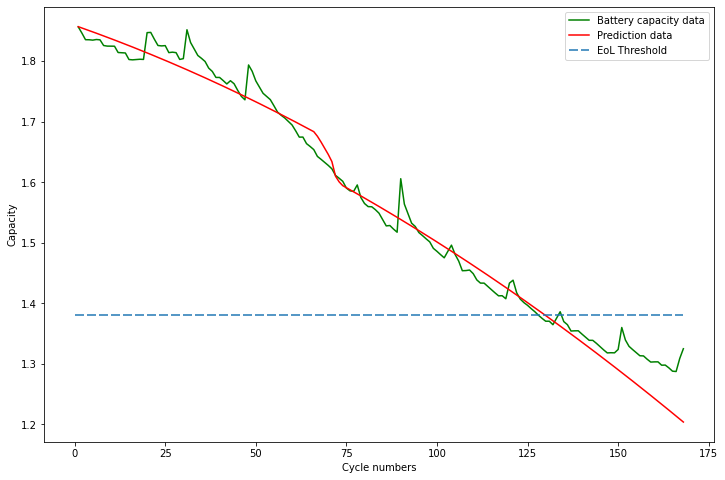

In [17]:
fig, ax = plt.subplots(1, figsize=(12, 8))

dataset, _ = load_data('B0005')
X = dataset[['cycle']]
y = dataset['capacity']
ax.plot(X, y, color='green', label='Battery capacity data')
ax.plot(X, results, color='red', label='Prediction data')
ax.plot([0.,168], [1.38, 1.38],dashes=[6, 2], label="EoL Threshold")
ax.set(xlabel='Cycle numbers', ylabel='Capacity')
ax.legend()


In [18]:
dataset['pre'] = results

pred=0
Afil=0
Pfil=0
a=dataset['capacity'].values
b=dataset['pre'].values
j=0
k=0
for i in range(len(a)):
    actual=a[i]
    
    if actual<=1.38:
        j=i
        Afil=dataset['cycle'][j]
        break
for i in range(len(a)):
    pred=b[i]
    if pred< 1.38:
        k=i
        Pfil=dataset['cycle'][k]
        break
print("The Actual fail at cycle number: "+ str(Afil))
print("The prediction fail at cycle number: "+ str(Pfil))
RULerror=Pfil-Afil
print("The error of RUL= "+ str(RULerror)+ " Cycle(s)")

The Actual fail at cycle number: 129
The prediction fail at cycle number: 130
The error of RUL= 1 Cycle(s)


In [19]:
train_predictions = exported_pipeline.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
print('Train RMSE: %.3f' % rmse)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))

test_predictions = exported_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print('Test RMSE: %.3f' % rmse)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Train RMSE: 0.020
Train R2 score: 0.9826512195746897
Test RMSE: 0.052
Test R2 score: -4.7678464149143815


# Train with cycle only to predict capacity

In [44]:
dataset, capacity = load_data('B0005')

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.8564874208181574, 4.191491807505295, -0.004901589207462691, 24.330033885570543, -0.0006, 0.0, 0.0]


In [45]:
X = capacity[['cycle']]
X

,cycle
0,1
1,2
2,3
3,4
4,5
...,...
163,164
164,165
165,166
166,167


In [46]:
y = capacity[['capacity']]
y

,capacity
0,1.856487
1,1.846327
2,1.835349
3,1.835263
4,1.834646
...,...
163,1.293464
164,1.288003
165,1.287453
166,1.309015


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [48]:
# pickle data for later use
dump(X_train, open("pickle/dataset/battery/cycle_only/X_train.pkl", "wb"))
dump(y_train, open("pickle/dataset/battery/cycle_only/y_train.pkl", "wb"))
dump(X_test, open("pickle/dataset/battery/cycle_only/X_test.pkl", "wb"))
dump(y_test, open("pickle/dataset/battery/cycle_only/y_test.pkl", "wb"))

## SVR

In [24]:
# load data
X_train = load(open('pickle/dataset/battery/cycle_only/X_train.pkl', 'rb'))
y_train = load(open('pickle/dataset/battery/cycle_only/y_train.pkl', 'rb'))
X_test = load(open('pickle/dataset/battery/cycle_only/X_test.pkl', 'rb'))
y_test = load(open('pickle/dataset/battery/cycle_only/y_test.pkl', 'rb'))

In [25]:
svr = SVR(C=20, epsilon=0.0001, gamma=0.00001, cache_size=200,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

svr.fit(X_train,y_train)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=20, epsilon=0.0001, gamma=1e-05)

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.8564874208181574, 4.191491807505295, -0.004901589207462691, 24.330033885570543, -0.0006, 0.0, 0.0]


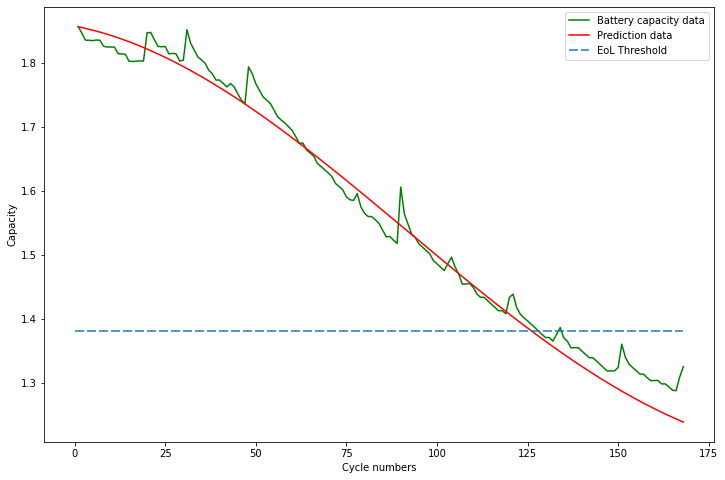

In [26]:
y_pred = svr.predict(X_train.append(X_test))

_, capacity = load_data('B0005')
X = capacity[['cycle']]
y = capacity[['capacity']]

fig, ax = plt.subplots(1, figsize=(12, 8))
ax.plot(X, y, color='green', label='Battery capacity data')
ax.plot(X, y_pred, color='red', label='Prediction data')
ax.plot([0.,168], [1.38, 1.38],dashes=[6, 2], label="EoL Threshold")
ax.set(xlabel='Cycle numbers', ylabel='Capacity')
ax.legend()

In [27]:
capacity['pre'] = y_pred
capacity

,cycle,ambient_temperature,datetime,capacity,pre
0,1,24,2008-04-02 15:25:41,1.856487,1.856368
1,2,24,2008-04-02 19:43:48,1.846327,1.855144
2,3,24,2008-04-03 00:01:06,1.835349,1.853850
3,4,24,2008-04-03 04:16:37,1.835263,1.852485
4,5,24,2008-04-03 08:33:25,1.834646,1.851051
...,...,...,...,...,...
163,164,24,2008-05-26 10:44:38,1.293464,1.248398
164,165,24,2008-05-26 15:30:43,1.288003,1.245814
165,166,24,2008-05-26 20:21:04,1.287453,1.243283
166,167,24,2008-05-27 15:52:41,1.309015,1.240807


In [28]:
pred=0
Afil=0
Pfil=0
a=capacity['capacity'].values
b=capacity['pre'].values
j=0
k=0
for i in range(len(a)):
    actual=a[i]
    
    if actual<=1.38:
        j=i
        Afil=capacity['cycle'][j]
        break
for i in range(len(a)):
    pred=b[i]
    if pred< 1.38:
        k=i
        Pfil=capacity['cycle'][k]
        break
print("The Actual fail at cycle number: "+ str(Afil))
print("The prediction fail at cycle number: "+ str(Pfil))
RULerror=Pfil-Afil
print("The error of RUL= "+ str(RULerror)+ " Cycle(s)")

The Actual fail at cycle number: 129
The prediction fail at cycle number: 127
The error of RUL= -2 Cycle(s)


In [29]:
train_predictions = svr.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
print('Train RMSE: %.3f' % rmse)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))

test_predictions = svr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print('Test RMSE: %.3f' % rmse)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Train RMSE: 0.021
Train R2 score: 0.9826602260326737
Test RMSE: 0.041
Test R2 score: -2.4280651482293845


## TPOT

In [30]:
# load data
X_train = load(open('pickle/dataset/battery/cycle_only/X_train.pkl', 'rb'))
y_train = load(open('pickle/dataset/battery/cycle_only/y_train.pkl', 'rb'))
X_test = load(open('pickle/dataset/battery/cycle_only/X_test.pkl', 'rb'))
y_test = load(open('pickle/dataset/battery/cycle_only/y_test.pkl', 'rb'))

In [56]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('TPOT/tpot_battery_cycle_only_pipeline.py')

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                                                                              
Generation 1 - Current best internal CV score: -0.0016215186751841124
                                                                              
Generation 2 - Current best internal CV score: -0.0016215186751841124
                                                                              
Generation 3 - Current best internal CV score: -0.0016215186751841124
                                                                              
Generation 4 - Current best internal CV score: -0.0013627184353332035
                                                                              
Generation 5 - Current best internal CV score: -0.0007889327968975957
                                                                              
Best pipeline: SGDRegressor(RobustScaler(AdaBoostRegressor(RobustScaler(input_matrix), learning_rate=0.001, loss=linear, n_estimators=100)), alpha=0.001, eta0=0.01, fit_interce

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Try the best TPOT

In [31]:
# load data
X_train = load(open('pickle/dataset/battery/cycle_only/X_train.pkl', 'rb'))
y_train = load(open('pickle/dataset/battery/cycle_only/y_train.pkl', 'rb'))
X_test = load(open('pickle/dataset/battery/cycle_only/X_test.pkl', 'rb'))
y_test = load(open('pickle/dataset/battery/cycle_only/y_test.pkl', 'rb'))

In [32]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import RobustScaler
from tpot.builtins import StackingEstimator

exported_pipeline = make_pipeline(
    RobustScaler(),
    StackingEstimator(estimator=AdaBoostRegressor(learning_rate=0.001, loss="linear", n_estimators=100)),
    RobustScaler(),
    SGDRegressor(alpha=0.001, eta0=0.01, fit_intercept=True, l1_ratio=0.0, learning_rate="constant", loss="huber", penalty="elasticnet", power_t=0.5)
)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_train.append(X_test))

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.8564874208181574, 4.191491807505295, -0.004901589207462691, 24.330033885570543, -0.0006, 0.0, 0.0]


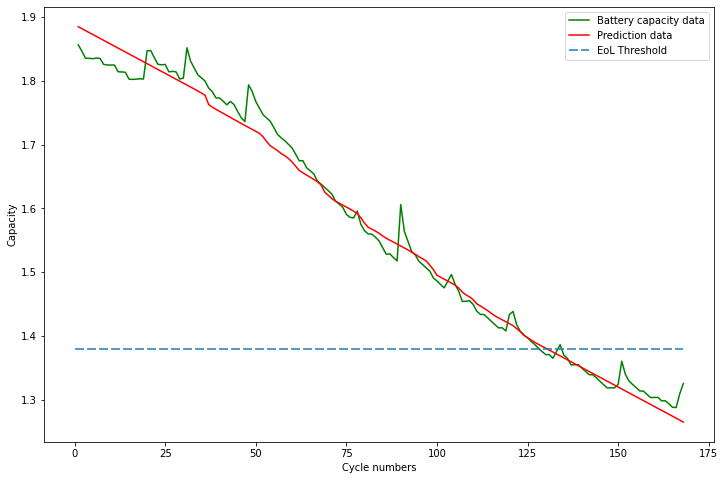

In [33]:
fig, ax = plt.subplots(1, figsize=(12, 8))

_, capacity = load_data('B0005')
X = capacity[['cycle']]
y = capacity['capacity']
ax.plot(X, y, color='green', label='Battery capacity data')
ax.plot(X, results, color='red', label='Prediction data')
ax.plot([0.,168], [1.38, 1.38],dashes=[6, 2], label="EoL Threshold")
ax.set(xlabel='Cycle numbers', ylabel='Capacity')
ax.legend()

In [34]:
capacity['pre'] = results

pred=0
Afil=0
Pfil=0
a=capacity['capacity'].values
b=capacity['pre'].values
j=0
k=0
for i in range(len(a)):
    actual=a[i]
    
    if actual<=1.38:
        j=i
        Afil=capacity['cycle'][j]
        break
for i in range(len(a)):
    pred=b[i]
    if pred< 1.38:
        k=i
        Pfil=capacity['cycle'][k]
        break
print("The Actual fail at cycle number: "+ str(Afil))
print("The prediction fail at cycle number: "+ str(Pfil))
RULerror=Pfil-Afil
print("The error of RUL= "+ str(RULerror)+ " Cycle(s)")

The Actual fail at cycle number: 129
The prediction fail at cycle number: 131
The error of RUL= 2 Cycle(s)


In [35]:
train_predictions = exported_pipeline.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
print('Train RMSE: %.3f' % rmse)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))

test_predictions = exported_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print('Test RMSE: %.3f' % rmse)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Train RMSE: 0.023
Train R2 score: 0.9792009985331469
Test RMSE: 0.018
Test R2 score: 0.3085042784051355
